In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (14, 3)
Shape of transformed X: (14, 2)


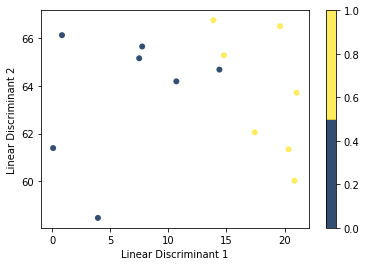

In [30]:
X = np.array([[170, 57, 32], [192, 95, 28], [150, 45, 30], [170, 65, 29], [175, 78, 35], [185, 90, 32], [170, 65, 28], [
    155, 48, 31], [160, 55, 30], [182, 80, 30], [175, 69, 28], [180, 80, 27], [160, 50, 31], [175, 72, 30]])
y = np.array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])


target_names = np.array(['Man', 'Woman'])
# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('cividis', 2))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()